# Personalización de barras de colores

Las leyendas de gráficos identifican etiquetas discretas de puntos discretos.
Para etiquetas continuas basadas en el color de puntos, líneas o regiones, una barra de colores etiquetada puede ser una gran herramienta.
En Matplotlib, una barra de colores es un eje separado que puede proporcionar una clave para el significado de los colores en un gráfico.
Debido a que el libro está impreso en blanco y negro, esta sección tiene un suplemento en línea que lo acompaña donde puede ver las figuras a todo color (https://github.com/jakevdp/PythonDataScienceHandbook).
Comenzaremos configurando el cuaderno para trazar e importar las funciones que usaremos:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [ ]:
%matplotlib inline
import numpy as np

Como hemos visto varias veces a lo largo de esta sección, la barra de colores más simple se puede crear con la función ``plt.colorbar``:

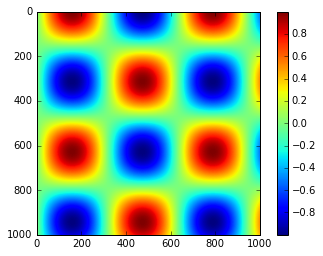

In [ ]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

Ahora discutiremos algunas ideas para personalizar estas barras de colores y usarlas de manera efectiva en varias situaciones.

## Personalización de barras de colores
El mapa de colores se puede especificar usando el argumento ``cmap`` para la función de trazado que está creando la visualización:

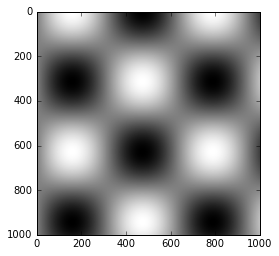

In [ ]:
plt.imshow(I, cmap='gray');

Todos los mapas de color disponibles están en el espacio de nombres ``plt.cm``; el uso de la función de finalización de pestañas de IPython le dará una lista completa de posibilidades integradas:
```
plt.cm.<TAB>
```
Pero ser *capaz* de elegir un mapa de colores es solo el primer paso: ¡más importante es cómo *decidir* entre las posibilidades!
La elección resulta ser mucho más sutil de lo que cabría esperar inicialmente.

### Elegir el mapa de colores
Un tratamiento completo de la elección del color dentro de la visualización está más allá del alcance de este libro, pero para una lectura entretenida sobre este tema y otros, consulte el artículo ["Ten Simple Rules for Better Figures"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833).
La documentación online de Matplotlib también tiene una [interesante discusión](http://Matplotlib.org/1.4.1/users/colormaps.html) sobre la elección del mapa de colores. 
En términos generales, debe tener en cuenta tres categorías diferentes de mapas de colores:
- *Mapas de colores secuenciales*: Estos se componen de una secuencia continua de colores (por ejemplo, ``binary`` o ``viridis``).
- *Mapas de colores divergentes*: normalmente contienen dos colores distintos, que muestran desviaciones positivas y negativas de una media (por ejemplo, ``RdBu`` o ``PuOr``).
- *Mapas de colores cualitativos*: estos mezclan colores sin una secuencia en particular (por ejemplo, ``arcoíris`` o ``chorro``).
El mapa de colores ``jet``, que era el predeterminado en Matplotlib antes de la versión 2.0, es un ejemplo de un mapa de colores cualitativo.
Su estado como predeterminado fue bastante desafortunado, porque los mapas cualitativos a menudo son una mala elección para representar datos cuantitativos.
Entre los problemas está el hecho de que los mapas cualitativos generalmente no muestran una progresión uniforme en el brillo a medida que aumenta la escala.
Podemos ver esto convirtiendo la barra de color ``jet`` en blanco y negro:

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

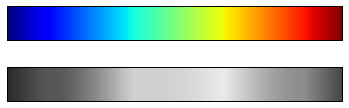

In [ ]:
view_colormap('jet')

Observe las rayas brillantes en la imagen en escala de grises.
Incluso a todo color, este brillo desigual significa que el ojo se verá atraído por ciertas partes de la gama de colores, lo que potencialmente enfatizará partes sin importancia del conjunto de datos.
Es mejor usar un mapa de colores como ``viridis`` (el predeterminado a partir de Matplotlib 2.0), que está diseñado específicamente para tener una variación de brillo uniforme en todo el rango.
Por lo tanto, no solo juega bien con nuestra percepción del color, sino que también se traducirá bien en la impresión en escala de grises:

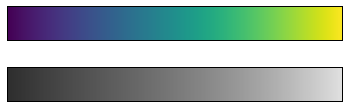

In [ ]:
view_colormap('viridis')

Si prefiere los esquemas de arcoíris, otra buena opción para datos continuos es el mapa de colores ``cubehelix``:

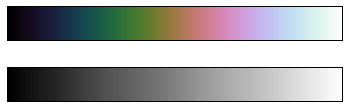

In [ ]:
view_colormap('cubehelix')

Para otras situaciones, como mostrar desviaciones positivas y negativas de alguna media, las barras de colores de dos colores como ``RdBu`` (*Rojo-Azul*) pueden ser útiles. Sin embargo, como puede ver en la siguiente figura, es importante tener en cuenta que la información positiva-negativa se perderá al traducirse a escala de grises.

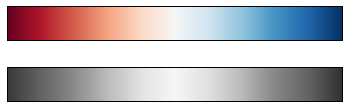

In [ ]:
view_colormap('RdBu')

Veremos ejemplos del uso de algunos de estos mapas de color a medida que continuamos.
Hay una gran cantidad de mapas de colores disponibles en Matplotlib; para ver una lista de ellos, puede usar IPython para explorar el submódulo ``plt.cm``. Para un enfoque más basado en principios de los colores en Python, puede consultar las herramientas y la documentación dentro de la biblioteca de Seaborn (consulte [Visualización con Seaborn](04.14-Visualización-con-Seaborn.ipynb)).

### Límites de color y extensiones
Matplotlib permite una amplia gama de personalización de barras de colores.
La barra de colores en sí es simplemente una instancia de ``plt.Axes``, por lo que todos los ejes y trucos de formateo de ticks que hemos aprendido son aplicables.
La barra de colores tiene una flexibilidad interesante: por ejemplo, podemos reducir los límites de color e indicar los valores fuera de los límites con una flecha triangular en la parte superior e inferior configurando la propiedad ``extender``.
Esto puede resultar útil, por ejemplo, si se muestra una imagen sujeta a ruido:

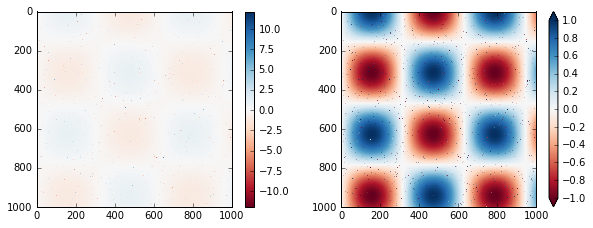

In [ ]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

Observe que en el panel izquierdo, los límites de color predeterminados responden a los píxeles ruidosos, y el rango del ruido elimina por completo el patrón que nos interesa.
En el panel derecho, establecemos manualmente los límites de color y agregamos extensiones para indicar valores que están por encima o por debajo de esos límites.
El resultado es una visualización mucho más útil de nuestros datos.

### Barras de color discretas
Los mapas de colores son continuos de forma predeterminada, pero a veces le gustaría representar valores discretos.
La forma más sencilla de hacer esto es usar la función ``plt.cm.get_cmap()`` y pasar el nombre de un mapa de colores adecuado junto con el número de contenedores deseados:

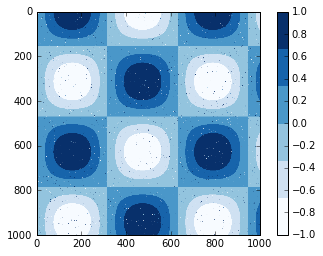

In [ ]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

La versión discreta de un mapa de colores se puede utilizar como cualquier otro mapa de colores.

## Ejemplo: dígitos escritos a mano
Para ver un ejemplo de dónde podría ser útil, veamos una visualización interesante de algunos datos de dígitos escritos a mano.
Estos datos están incluidos en Scikit-Learn y consisten en casi 2000 miniaturas de $8 \times 8$ que muestran varios dígitos escritos a mano.
Por ahora, comencemos descargando los datos de los dígitos y visualizando varias de las imágenes de ejemplo con ``plt.imshow()``:

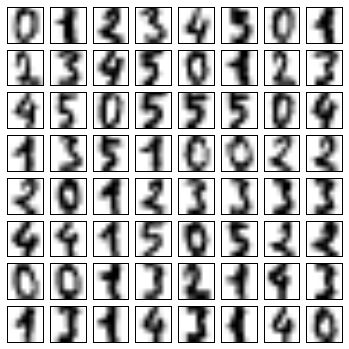

In [ ]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Debido a que cada dígito se define por el tono de sus 64 píxeles, podemos considerar que cada dígito es un punto que se encuentra en un espacio de 64 dimensiones: cada dimensión representa el brillo de un píxel.
Pero visualizar relaciones en espacios de dimensiones tan altas puede ser extremadamente difícil.
Una forma de abordar esto es usar una técnica de *reducción de dimensionalidad* como el aprendizaje múltiple para reducir la dimensionalidad de los datos mientras se mantienen las relaciones de interés.
La reducción de la dimensionalidad es un ejemplo de aprendizaje automático no supervisado y lo analizaremos con más detalle en [Qué es Machine Learning?](05.01-Qué-es-Machine-Learning.ipynb).
Aplazando la discusión de estos detalles, echemos un vistazo a una proyección de aprendizaje múltiple bidimensional de estos datos de dígitos (ver [En profundidad: Aprendizaje múltiple](05.10-Aprendizaje-múltiple.ipynb) para más detalles):

In [ ]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

Usaremos nuestro mapa de colores discreto para ver los resultados, configurando ``ticks`` y ``clim`` para mejorar la estética de la barra de colores resultante:

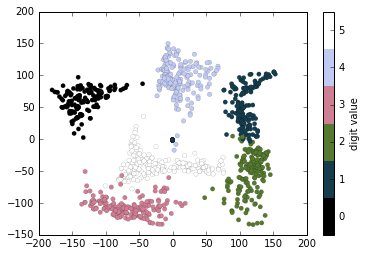

In [ ]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

La proyección también nos brinda información interesante sobre las relaciones dentro del conjunto de datos: por ejemplo, los rangos de 5 y 3 casi se superponen en esta proyección, lo que indica que algunos cincos y treses escritos a mano son difíciles de distinguir y, por lo tanto, es más probable que se confundan. por un algoritmo de clasificación automatizado.
Otros valores, como 0 y 1, están separados más distantes y, por lo tanto, es mucho menos probable que se confundan.
Esta observación concuerda con nuestra intuición, porque 5 y 3 se parecen mucho más que 0 y 1.
Volveremos al aprendizaje múltiple ya la clasificación de dígitos en [Capítulo 5](05.00-Machine-Learning.ipynb).